# Malaria Commodity Prediction
County predictions for malaria commodities.
Note this is not the official model book. This is a test lab used for modelling solutions using sklearn. Kindly review Model Lab.ipynb for the official model.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense


In [124]:
dataframe=pd.read_csv('data.csv')
#retieve 4 rows
dataframe.head(4)

,periodid,periodname,periodcode,perioddescription,dataid,dataname,datacode,datadescription,Baringo County,Bomet County,...,Siaya County,Taita Taveta County,Tana River County,Tharaka Nithi County,Trans Nzoia County,Turkana County,Uasin Gishu County,Vihiga County,Wajir County,West Pokot County
0,202201,Jan-22,202201,Hot,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,2644,626,...,67556,496,4000.0,1148,4598,31277,3127,29950,1146,8189
1,202202,Feb-22,202202,Hot,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,3529,444,...,52890,983,2889.0,1398,5390,23382,2006,20458,1197,6908
2,202203,Mar-22,202203,Wet,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,2998,460,...,50940,1015,2392.0,671,6367,19729,2093,19161,885,6343
3,202204,Apr-22,202204,Wet,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,2755,508,...,41512,698,1567.0,509,5187,22980,1221,18753,936,9657


# Model Development

In [89]:
#using the dates as the main predictors
X=np.array(dataframe['periodid'],dtype='float32')

#scaling our data for consistencey
X=X/(100*np.ones(len(X)))
print(X)

[2022.01 2022.02 2022.03 2022.04 2022.05 2022.06 2022.07 2022.08 2022.09
 2022.1  2022.11 2022.12 2021.01 2021.02 2021.03 2021.04 2021.05 2021.06
 2021.07 2021.08 2021.09 2021.1  2021.11 2021.12 2020.01 2020.02 2020.03
 2020.04 2020.05 2020.06 2020.07 2020.08 2020.09 2020.1  2020.11 2020.12
 2019.01 2019.02 2019.03 2019.04 2019.05 2019.06 2019.07 2019.08 2019.09
 2019.1  2019.11 2019.12 2018.01 2018.02 2018.03 2018.04 2018.05 2018.06
 2018.07 2018.08 2018.09 2018.1  2018.11 2018.12]


# Baringo County Model

In [90]:
#baringo county
y_baringo=np.array(dataframe['Baringo County'],dtype='float32')
print(y_baringo)
#histogram

[ 2644.  3529.  2998.  2755.  2878.  3433.  2286.  2908.  5001.  3934.
  2774.  3300.  3176. 10559.  4618.  3911.  3923.  3858.  3722.  4933.
  4806.  3054.  2725.  3080.  4521.  8826.  8935.  4403.  2354.  2792.
  2347.  2544.  4593.  1826.  2128.  3040.  1670.   955.  2187.  2038.
  2406.  1922.  2315.  1687.  2866.  1581.  2403.  2398.  1711.  2617.
  2101.  1269.  2955.  4017.  4122.  2226.  1007.  1155.   793.  1113.]


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LRG
X_train,X_test,y_train,y_test=train_test_split(X,y_baringo,test_size=0.3,random_state=None)


In [209]:
X_test

array([[0.729927  ],
       [0.7347932 ],
       [0.25547445],
       [0.513382  ],
       [0.2676399 ],
       [0.25304136],
       [0.7469586 ],
       [0.9781022 ],
       [0.74452555],
       [0.99756694],
       [0.49635038],
       [0.9829684 ],
       [0.98540145],
       [0.02189781],
       [0.00486618],
       [0.73722625],
       [0.5109489 ],
       [0.74939173]], dtype=float32)

In [57]:
print(f"X_train shape: {X_train.shape[0]}")
print(f"X_test shape: {X_test.shape[0]}")
print(f"y_train shape: {y_train.shape[0]} and data type: {y_train.dtype}")
print(f"y_test shape: {y_test.shape[0]}")

X_train shape: 42
X_test shape: 18
y_train shape: 42 and data type: float32
y_test shape: 18


In [208]:
#create model function to avoid repetitive task

def commodity_predictor(X,y):
    model=LRG().fit(X,y)
    
    return model

baringo_model=commodity_predictor(X_train,y_train)
print(f"Using model: {baringo_model}")
print(f"Score: {baringo_model.score(X_train,y_train)*100:.2f} %")


Using model: LinearRegression()
Score: 10.70 %


In [74]:
#prediction from the test data
X=np.array(dataframe['periodid'],dtype='float32')
def projection_test(X_samples):
 baringo_projection=baringo_model.predict(X_samples)

 for i in range(len(baringo_projection)):
    print(f"Year {str(int(X[i]))[:4]}, Month {str(int(X[i]))[4:]} - Demand: {baringo_projection[i]:.0f}")
    
projection_test(X_test)

Year 2022, Month 01 - Demand: 3704
Year 2022, Month 02 - Demand: 3713
Year 2022, Month 03 - Demand: 2798
Year 2022, Month 04 - Demand: 3291
Year 2022, Month 05 - Demand: 2822
Year 2022, Month 06 - Demand: 2794
Year 2022, Month 07 - Demand: 3736
Year 2022, Month 08 - Demand: 4178
Year 2022, Month 09 - Demand: 3732
Year 2022, Month 10 - Demand: 4215
Year 2022, Month 11 - Demand: 3258
Year 2022, Month 12 - Demand: 4187
Year 2021, Month 01 - Demand: 4191
Year 2021, Month 02 - Demand: 2353
Year 2021, Month 03 - Demand: 2320
Year 2021, Month 04 - Demand: 3718
Year 2021, Month 05 - Demand: 3286
Year 2021, Month 06 - Demand: 3741


# Looking at Time Series

In [76]:
from sklearn.model_selection import TimeSeriesSplit

t_series=TimeSeriesSplit()
print(t_series)

for i,(train_index,test_index) in enumerate(t_series.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Fold 0:
  Train: index=[0 1 2 3 4 5 6 7 8 9]
  Test:  index=[10 11 12 13 14 15 16 17 18 19]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
  Test:  index=[20 21 22 23 24 25 26 27 28 29]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
  Test:  index=[30 31 32 33 34 35 36 37 38 39]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
  Test:  index=[40 41 42 43 44 45 46 47 48 49]
Fold 4:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
  Test:  index=[50 51 52 53 54 55 56 57 58 59]


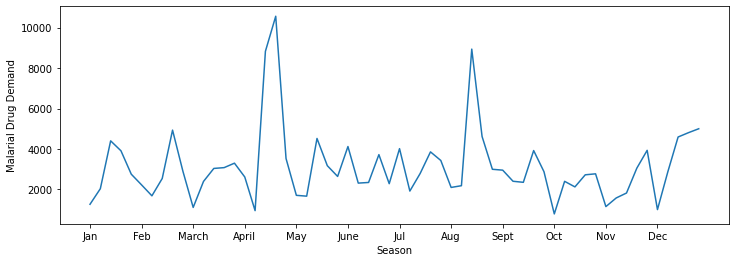

In [119]:
fig, ax = plt.subplots(figsize=(12, 4))
commodity_demand = dataframe.groupby(["periodname"])["Baringo County"].mean()
commodity_demand.plot(ax=ax)
_ = ax.set(
    title="",
    xticks=[i*5for i in range(12)],
    xticklabels=["Jan", "Feb", "March", "April", "May", "June", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"],
    xlabel="Season",
    ylabel="Malarial Drug Demand",
)

In [125]:
X = dataframe['perioddescription'].value_counts()
X

Hot    30
Wet    30
Name: perioddescription, dtype: int64

In [219]:
from sklearn.model_selection import TimeSeriesSplit
ts_crossval = TimeSeriesSplit(
    n_splits=4,
    gap=4,
    max_train_size=48,
    test_size=12,
)

In [223]:
all_splits = list(ts_crossval.split(dataframe['periodid'], dataframe['Baringo County']))
train_0, test_0 = all_splits[0]
train_1, test_1 = all_splits[1]
train_2, test_2 = all_splits[2]
train_3, test_3 = all_splits[3]

In [170]:
dataframe['periodid'].iloc[test_0]

36    201901
37    201902
38    201903
39    201904
40    201905
41    201906
42    201907
43    201908
44    201909
45    201910
46    201911
47    201912
Name: periodid, dtype: int64

In [185]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()


In [186]:
dataframe['perioddescription']=label_encoder.fit_transform(dataframe['perioddescription'])
dataframe['perioddescription'].unique

<bound method Series.unique of 0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    1
28    1
29    1
30    1
31    1
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    1
40    1
41    1
42    1
43    1
44    0
45    0
46    0
47    0
48    0
49    0
50    1
51    1
52    1
53    1
54    1
55    1
56    0
57    0
58    0
59    0
Name: perioddescription, dtype: int64>

In [217]:
#use test set to give prediction
X_b=dataframe['periodid']
y_b=dataframe['Baringo County']

gbr_model=GradientBoostingRegressor(
    n_estimators=200,max_depth=1,random_state=1
)
#fit training data
gbr_model.fit(X_b.iloc[train_0].values.reshape(-1,1),y_b.iloc[train_0])

GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=1)

In [215]:

y_hat=gbr_model.predict(X_b.iloc[test_0].values.reshape(-1,1))
y_hat

array([5295.20963726, 5295.20963726, 5295.20963726, 5295.20963726,
       5295.20963726, 5295.20963726, 5295.20963726, 5295.20963726,
       5295.20963726, 5295.20963726, 5295.20963726, 5295.20963726])

In [224]:
#fit training data
gbr_model.fit(X_b.iloc[train_1].values.reshape(-1,1),y_b.iloc[train_1])

y_hat_=gbr_model.predict(X_b.iloc[test_1].values.reshape(-1,1))
y_hat_

array([3473.58072376, 3473.58072376, 3473.58072376, 3473.58072376,
       3473.58072376, 3473.58072376, 3473.58072376, 3473.58072376,
       3473.58072376, 3473.58072376, 3473.58072376, 3473.58072376])

In [225]:
#fit training data
gbr_model.fit(X_b.iloc[train_2].values.reshape(-1,1),y_b.iloc[train_2])

y_hat_2=gbr_model.predict(X_b.iloc[test_2].values.reshape(-1,1))
y_hat_2

array([5295.20963726, 5295.20963726, 5295.20963726, 5295.20963726,
       5295.20963726, 5295.20963726, 5295.20963726, 5295.20963726,
       5295.20963726, 5295.20963726, 5295.20963726, 5295.20963726])

In [226]:
#fit training data
gbr_model.fit(X_b.iloc[train_3].values.reshape(-1,1),y_b.iloc[train_3])

y_hat_3=gbr_model.predict(X_b.iloc[test_3].values.reshape(-1,1))
y_hat_3

array([1918.52507363, 1918.52507363, 1918.52507363, 1918.52507363,
       1918.52507363, 1918.52507363, 1918.52507363, 1918.52507363,
       1918.52507363, 1918.52507363, 1918.52507363, 1918.52507363])

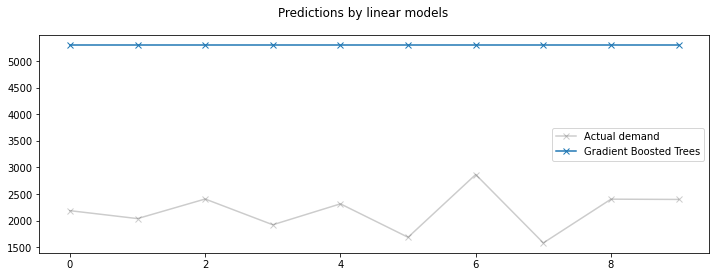

In [216]:
last_hours = slice(-10, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y_b.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual demand",
    color="black",
)
ax.plot(
    y_hat[last_hours],
    "x-",
    label="Gradient Boosted Trees",
)
_ = ax.legend()